<a href="https://colab.research.google.com/github/yamad07/ai-browser/blob/main/web%E3%82%B5%E3%82%A4%E3%83%88%E6%A7%8B%E9%80%A0%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## install dependencies

In [1]:
!pip install langchain
!pip install unstructured
!pip install selenium

# Install playwright
!pip install "playwright"
!pip install "unstructured"
!playwright install

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.0/90.0 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 39.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 29.3 MB/s eta 0:00:00
146.4 Mb [] 0% 0.0s146.4 Mb [] 0% 29.8s146.4 Mb [] 0% 23.4s146.4 Mb [] 0% 9.7s146.4 Mb [] 0% 6.7s146.4 Mb [] 1% 4.7s146.4 Mb [] 2% 3.7s146.4 Mb [] 3% 3.3s146.4 Mb [] 3% 3.2s146.4 Mb [] 4% 3.4s146.4 Mb [] 5% 3.3s146.4 Mb [] 6% 2.9s146.4 Mb [] 8% 2.7s146.4 Mb [] 9% 2.5s146.4 Mb [] 10% 2.4s146.4 Mb [] 10% 2.3s146.4 Mb [] 11% 2.3s146.4 Mb [] 12% 2.1s146.4 Mb [] 13%

In [2]:
import pandas as pd

def show_table(dicts, datetime_column=''):
  df = pd.DataFrame(dicts)
  if datetime_column == '':
    return df
  df['Date(converted)'] = df[datetime_column].apply(convert_to_datetime)
  return d

## seleniumをColabで動かすための処理

In [ ]:
%%shell
# Ubuntu no longer distributes chromium-browser outside of snap
#
# Proposed solution: https://askubuntu.com/questions/1204571/how-to-install-chromium-without-snap

# Add debian buster
cat > /etc/apt/sources.list.d/debian.list <<'EOF'
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster.gpg] http://deb.debian.org/debian buster main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-buster-updates.gpg] http://deb.debian.org/debian buster-updates main
deb [arch=amd64 signed-by=/usr/share/keyrings/debian-security-buster.gpg] http://deb.debian.org/debian-security buster/updates main
EOF

# Add keys
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
apt-key adv --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A

apt-key export 77E11517 | gpg --dearmour -o /usr/share/keyrings/debian-buster.gpg
apt-key export 22F3D138 | gpg --dearmour -o /usr/share/keyrings/debian-buster-updates.gpg
apt-key export E562B32A | gpg --dearmour -o /usr/share/keyrings/debian-security-buster.gpg

# Prefer debian repo for chromium* packages only
# Note the double-blank lines between entries
cat > /etc/apt/preferences.d/chromium.pref << 'EOF'
Package: *
Pin: release a=eoan
Pin-Priority: 500


Package: *
Pin: origin "deb.debian.org"
Pin-Priority: 300


Package: chromium*
Pin: origin "deb.debian.org"
Pin-Priority: 700
EOF

# Install chromium and chromium-driver
apt-get update
apt-get install chromium chromium-driver

# Install selenium
pip install selenium

Executing: /tmp/apt-key-gpghome.MgqBjrvQkz/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys DCC9EFBF77E11517
gpg: key DCC9EFBF77E11517: public key "Debian Stable Release Key (10/buster) <debian-release@lists.debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.RZVI617Btx/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 648ACFD622F3D138
gpg: key DC30D7C23CBBABEE: public key "Debian Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Executing: /tmp/apt-key-gpghome.QsRt5FTyc5/gpg.1.sh --keyserver keyserver.ubuntu.com --recv-keys 112695A0E562B32A
gpg: key 4DFAB270CAA96DFA: public key "Debian Security Archive Automatic Signing Key (10/buster) <ftpmaster@debian.org>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 http://deb.debian.org/debian buster InRelease [122 kB]
Get:2 http://deb.debian.org/debian bust

## スクレイピング

### テキスト情報を抽出する

In [ ]:
import asyncio

from langchain.document_loaders import SeleniumURLLoader
from langchain.document_loaders import PlaywrightURLLoader

async def load_with_playwright(url):
  from playwright.async_api import async_playwright
  from unstructured.partition.html import partition_html

  async with async_playwright() as p:
    browser = await p.chromium.launch(headless=True)
    page = await browser.new_page()
    await page.goto(url)

    remove_selectors = ["header", "footer"]
    for selector in remove_selectors or []:
        elements = await page.locator(selector).all()
        for element in elements:
            if await element.is_visible():
                await element.evaluate("element => element.remove()")

    pgc = await page.content()
    return pgc

    # この辺りでa tag 以外を取り除く
    page_source = await page.content()
    elements = partition_html(text=page_source)
    text = "\n\n".join([str(el) for el in elements])
    metadata = {"source": url}
    # docs.append(Document(page_content=text, metadata=metadata))
    return text

'<!DOCTYPE html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>マルクス0 - Google Search</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.uwHuQY_gg44.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo_V1jKXTs4TkQZGty4n4aTwpK1Z_Q/cb=gapi.loaded_0" nonce="" async=""></script><script nonce="">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'JX6yZOHJE5K40PEP1tWqmAU\',kEXPI:\'31\',kBL:\'4kR9\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'en\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.go
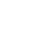
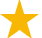
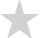
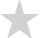
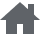
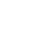
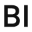
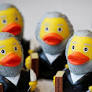
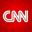
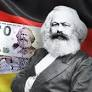
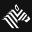
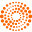
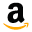
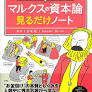
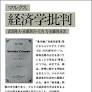
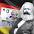
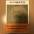
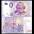
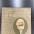
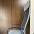
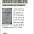
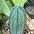
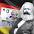
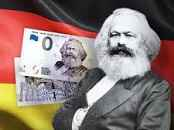
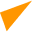
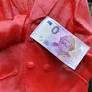
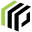
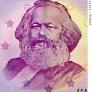
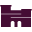
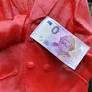
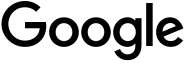

In [ ]:
url = "https://www.google.com/search?q=マルクス0&oq=%E3%82%B3%E3%83%BC%E3%83%92%E3%83%BC%E7%94%A3%E5%9C%B0&aqs=chrome..69i57.9301j0j4&sourceid=chrome&ie=UTF-8"

page_contents = await load_with_playwright(url)
page_contents

'<!DOCTYPE html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>マルクス0 - Google Search</title><script src="https://apis.google.com/_/scs/abc-static/_/js/k=gapi.gapi.en.uwHuQY_gg44.O/m=gapi_iframes,googleapis_client/rt=j/sv=1/d=1/ed=1/rs=AHpOoo_V1jKXTs4TkQZGty4n4aTwpK1Z_Q/cb=gapi.loaded_0" nonce="" async=""></script><script nonce="">(function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:\'JX6yZOHJE5K40PEP1tWqmAU\',kEXPI:\'31\',kBL:\'4kR9\',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn=\'web\';google.kHL=\'en\';})();(function(){\nvar h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.go
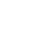
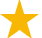
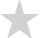
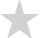
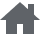
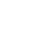
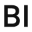
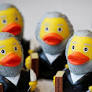
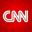
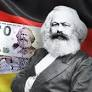
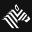
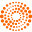
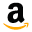
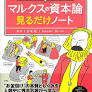
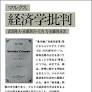
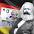
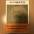
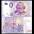
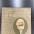
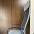
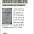
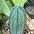
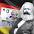
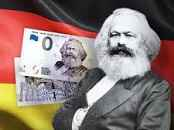
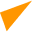
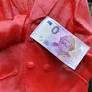
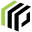
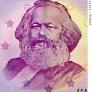
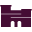
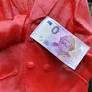
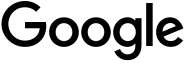

In [ ]:
page_contents

In [ ]:
pg_content

<coroutine object load_with_playwright at 0x7a81860c4f20>

In [ ]:

urls = ["https://www.google.com/search?q=マルクス0&oq=%E3%82%B3%E3%83%BC%E3%83%92%E3%83%BC%E7%94%A3%E5%9C%B0&aqs=chrome..69i57.9301j0j4&sourceid=chrome&ie=UTF-8"]

loader = PlaywrightURLLoader(urls=urls, remove_selectors=["header", "footer"])
data = await loader.aload()
print(data)

[Document(page_content='Please click \n\nhere if you are not redirected within a few seconds.\n\nAccessibility Links\n\nSkip to main content\n\nTurn off continuous scrolling\n\nTurn on continuous scrolling\n\nAccessibility help\n\nAccessibility feedback\n\nPress / to jump to the search box\n\nSee moreDelete\n\nDelete\n\n\n\nReport inappropriate predictions\n\nFilters and Topics\n\nFilters and Topics\n\n画像\n\nニュース\n\n動画\n\nショッピング\n\nAbout 136,000,000 results\n\nSearch Results\n\n｢共産主義の父｣カール・マルクス、生誕200年を記念した0 ...Business Insider Japanhttps://www.businessinsider.jp › pos...\n\nBusiness Insider Japan\n\n› pos...\n\nTranslate this page\n\nApr 22, 2018 —\n\n『共産党宣言』や『資本論』で知られるマルクスは、1818年にドイツのトリーアで生まれた。0ユーロ紙幣の他、ゴム製のアヒルなども記念品として売られ\xa0...\n\n額面０ユーロのマルクス紙幣、ドイツで売り出され人気 - CNNCNNhttps://www.cnn.co.jp › Business\n\nCNN\n\n› Business\n\nTranslate this page\n\nApr 20, 2018 —\n\n「資本論」で知られる思想家カール・マルクスの肖像画をあしらった額面0ユーロの紙幣がドイツのトリーアで土産物として売り出され、飛ぶように売れて\xa0...\n\n額面0ユーロのマルクス紙幣、ドイツで売り出され人気NewsPickshttps://ne

In [ ]:
print(data[0].page_content)

Please click 

here if you are not redirected within a few seconds.

Accessibility Links

Skip to main content

Turn off continuous scrolling

Turn on continuous scrolling

Accessibility help

Accessibility feedback

Press / to jump to the search box

See moreDelete

Delete



Report inappropriate predictions

Filters and Topics

Filters and Topics

画像

ニュース

動画

ショッピング

About 136,000,000 results

Search Results

｢共産主義の父｣カール・マルクス、生誕200年を記念した0 ...Business Insider Japanhttps://www.businessinsider.jp › pos...

Business Insider Japan

› pos...

Translate this page

Apr 22, 2018 —

『共産党宣言』や『資本論』で知られるマルクスは、1818年にドイツのトリーアで生まれた。0ユーロ紙幣の他、ゴム製のアヒルなども記念品として売られ ...

額面０ユーロのマルクス紙幣、ドイツで売り出され人気 - CNNCNNhttps://www.cnn.co.jp › Business

CNN

› Business

Translate this page

Apr 20, 2018 —

「資本論」で知られる思想家カール・マルクスの肖像画をあしらった額面0ユーロの紙幣がドイツのトリーアで土産物として売り出され、飛ぶように売れて ...

額面0ユーロのマルクス紙幣、ドイツで売り出され人気NewsPickshttps://newspicks.com › news

NewsPicks

› news

Translate this page

「資本論」で知られる思想家カール・マルクスの肖像画をあしらった額面0ユー

### html要素をそのまま取得する

<html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/>
  <title>
   コーヒー産地 - Google Search
  </title>
  <script nonce="">
   (function(){var b=window.addEventListener;window.addEventListener=function(a,c,d){"unload"!==a&&b(a,c,d)};}).call(this);(function(){var _g={kEI:'bCrPZJ-iFp2vqtsP7oO34Ak',kEXPI:'31',kBL:'XHw5',kOPI:89978449};(function(){var a;(null==(a=window.google)?0:a.stvsc)?google.kEI=_g.kEI:window.google=_g;}).call(this);})();(function(){google.sn='web';google.kHL='en';})();(function(){
var h=this||self;function l(){return void 0!==window.google&&void 0!==window.google.kOPI&&0!==window.google.kOPI?window.google.kOPI:null};var m,n=[];function p(a){for(var b;a&&(!a.getAttribute||!(b=a.getAttribute("eid")));)a=a.parentNode;return b||m}function q(a){for(var b=null;a&&(!a.getAttribute||!(b=a.getAttribute("leid")));)a=a.parentNode
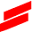
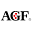
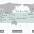
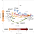
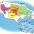
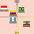
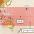
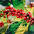
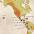
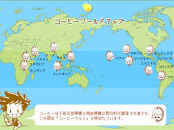
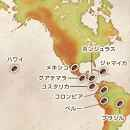
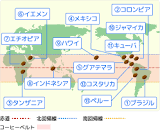
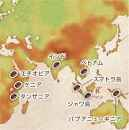
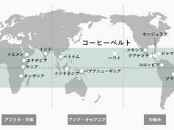
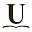
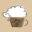
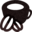
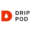
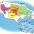
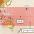
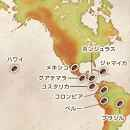
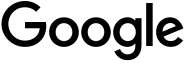

In [3]:
from selenium import webdriver
from bs4 import BeautifulSoup

from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options as ChromeOptions

# Seleniumの設定
chrome_options = ChromeOptions()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
# if self.binary_location is not None:
#     chrome_options.binary_location = self.binary_location
# if self.executable_path is None:
#     return Chrome(options=chrome_options)
driver = Chrome(options=chrome_options) # webdriver.Chrome()

# URLにアクセス
url = "https://www.google.com/search?q=%E3%82%B3%E3%83%BC%E3%83%92%E3%83%BC%E7%94%A3%E5%9C%B0&oq=%E3%82%B3%E3%83%BC%E3%83%92%E3%83%BC%E7%94%A3%E5%9C%B0&aqs=chrome..69i57.9301j0j4&sourceid=chrome&ie=UTF-8"

driver.get(url)

# ページのHTMLを取得
html = driver.page_source

# BeautifulSoupでHTMLを解析
soup = BeautifulSoup(html, 'html.parser')

# 解析したHTMLを表示
print(soup.prettify())

# ブラウザを閉じる
driver.quit()